<a href="https://colab.research.google.com/github/chelsea591/Machine_Learning_Qlab_PC/blob/main/PC1/PC1_Ejercicio2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica Calificada 1**
**Integrantes:**
* Lesly Guzmán
* Angie Quispe
* Marilia Aripazana
* Chelsea Torres

##**2. Boston Housing - Selección de Modela y Estabilidad**
 Predictor X = ```lstat```, Objetivo y = ```medv```



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import warnings

# Configuraciones básicas
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid') # Estilo limpio para gráficos

### **2.1 Selección del Grado del Polinomio**

In [ ]:
# 1. Cargar los datos desde la URL indicada en el PDF
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv" # [cite: 45]
boston = pd.read_csv(url)

# 2. Limpieza
boston_clean = boston.dropna(subset=['medv'])

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# 1. Definición de variables
X = boston_clean[['lstat']]
y = boston_clean['medv']
print(f"Datos Boston cargados correctamente. Observaciones: {X.shape[0]}")

Datos Boston cargados correctamente. Observaciones: 506


In [ ]:
# Definimos los grados y las listas de errores
degrees = range(1, 11)
val_errors = []
loocv_errors = []
kfold_errors = []

**Cálculo de Errores y Visualización**

Calculando errores...


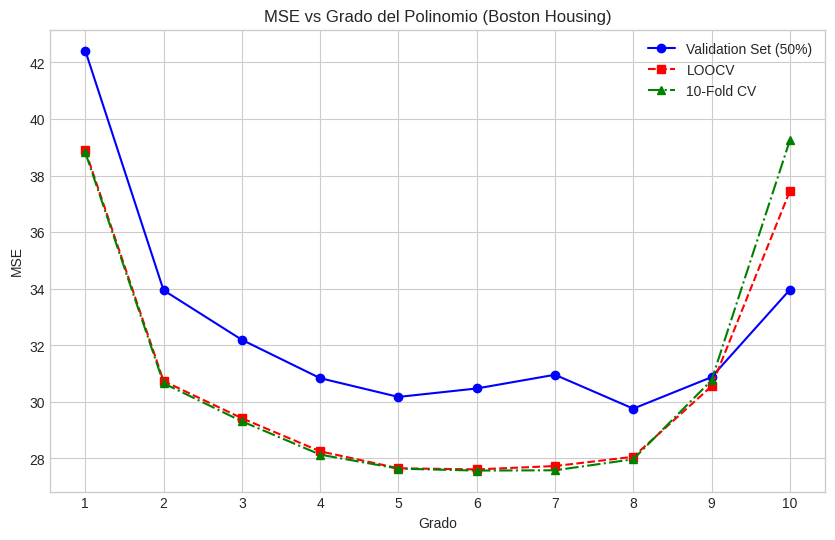

In [ ]:
# --- MÉTODO A: Validation Set Approach (50/50) ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=1)
print("Calculando errores...")

for d in degrees:
    # Creamos el modelo usando Pipeline
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())

    # 1. Validación Simple
    model.fit(X_train, y_train)
    pred_val = model.predict(X_val)
    val_errors.append(mean_squared_error(y_val, pred_val))

    # 2. LOOCV (Leave-One-Out)
    loo = LeaveOneOut()
    # scoring='neg_mean_squared_error' devuelve negativo
    scores_loo = cross_val_score(model, X, y, cv=loo, scoring='neg_mean_squared_error')
    loocv_errors.append(-scores_loo.mean())

    # 3. 10-Fold CV
    # Usamos random_state=1
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    scores_kfold = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    kfold_errors.append(-scores_kfold.mean())

# --- GRAFICAR  ---
plt.figure(figsize=(10, 6))
plt.plot(degrees, val_errors, 'b-o', label='Validation Set (50%)')
plt.plot(degrees, loocv_errors, 'r--s', label='LOOCV')
plt.plot(degrees, kfold_errors, 'g-.^', label='10-Fold CV')

plt.title('MSE vs Grado del Polinomio (Boston Housing)')
plt.xlabel('Grado')
plt.ylabel('MSE')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


####**Decisión**

**¿Cuál parece ser el grado óptimo del polinomio?**

Según el gráfico, el grado óptimo se encuentra en el **grado 6** de la curva **10-Fold**.

Por otro lado, se observa que los métodos no coinciden en el grado óptimo. Para el caso de la validación al 50/50 (la cual es la más errática entre los métodos), el punto óptimo se encuentra en el grado 8. En cambio para la curva LOOCV, el óptimo se encuentra en el grado 5.

Aunque el mínimo numérico se alcanza en el Grado 6, en la práctica se podría preferir un grado menor (como el 2 o el 5) si el error es similar, ya que los modelos más simples generalizan mejor y evitan el sobreajuste (overfitting).